In [2]:
# import packages
import pandas as pd
import numpy as np 
import statistics

import datetime

import os 

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

# 0. Intro

<font size="3"> Timeslots for group presentations online on ufora. 1 member per group can subscribe
 

# 1. Group Assignment

## Question 1

<font size="4"> What is the **date of the reviews?**

<font size="3"> The survey was conducted at the end of 2019. 
Let us investigate whether there is a difference in transaction amounts for customers that gave a good and bad review.

In [2]:
# import reviews 
reviews_df = pd.read_csv("./data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
# import transactions
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")

In [3]:
# convert date to datetime 
transactions_df["DATEONLY"] = pd.to_datetime(transactions_df["DATEONLY"])

In [5]:
# check all possible reviews
reviews_df["REVIEW"].unique()

array(['Good service, satisfied', 'No opinion',
       'Excellent service, very satisfied', 'Not completely satisfied',
       'Very bad service, very unsatisfied'], dtype=object)

In [6]:
# get customers with a very bad reviews
bad_customers = reviews_df[reviews_df["REVIEW"] == "Very bad service, very unsatisfied"]["SO0_NRID"].unique()
# get a customer with very good review
good_customers = reviews_df[reviews_df["REVIEW"] == "Excellent service, very satisfied"]["SO0_NRID"].unique()

In [705]:
############################
######### EXERCISE #########
############################


# get all the transactions for bad customers in 2019
bad_transactions_df = 


# get total transaction value per bad customer in 2019
bad_transaction_per_cust_df = 



In [706]:
############################
######### EXERCISE #########
############################


# get all the transactions for good customers in 2019
good_transactions_df = 


# get total transaction value per good customer in 2019
good_transaction_per_cust_df = 



In [ ]:
############################
######### EXERCISE #########
############################


# print mean transactions amount for bad and good customers


<font size="3">So we observe that there is a difference in transaction amounts for customers that gave a good and bad review. 
Lets now plot a boxplot for the transaction amounts for these two groups of customers.

In [708]:
# stack two datasets
all_transactions_per_cust = pd.concat([bad_transaction_per_cust_df, good_transaction_per_cust_df], axis=0)
# add customer indicator
all_transactions_per_cust["TYPE"] = ["bad" for i in range(len(bad_transaction_per_cust_df))] + ["good" for i in range(len(good_transactions_per_cust_df))]

In [ ]:
# get boxplot of transaction amounts of customers that wrote bad / good review
plt.figure(figsize=(10, 5))
sns.boxplot(data=all_transactions_per_cust, x="AMOUNT", y="TYPE")
plt.show()

<font size="3">Based on these boxplots, we can see that high transaction amounts are more likely to occur among the customers that gave a good review.

## Question 2

<font size="4"> Problems with **converting the VISITDATE variable**

In [7]:
# import data
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")
# convert dateonly
transactions_df["DATEONLY"] = pd.to_datetime(transactions_df["DATEONLY"])

In [8]:
# check visitdate
transactions_df["VISITDATE"].head(5)

0    12:20:01,000000000
1    12:13:50,000000000
2    12:14:08,000000000
3    12:16:04,000000000
4    10:41:09,000000000
Name: VISITDATE, dtype: object

<font size="3"> The VISITDATE represents the timestamp of the transaction. In Pandas, you can convert string variables to datetime variables by using the pd.to_datetime() function. Then, you can extract the timestamp of a datetime variable by using the time() method.

In [714]:
############################
######### EXERCISE #########
############################


# remove comma and all zeros after time stamp
transactions_df["VISITDATE"] = 


# convert string to datetime
transactions_df["VISITDATE"] = 


# extract time component
transactions_df["VISITDATE"] = 

In [ ]:
# check
transactions_df["VISITDATE"].head(5)

<font size="3">Now that we have extracted the timestamp of each transaction, 
we can sort the transactions chronologically by time.

In [717]:
# get all transactions for day 2019-05-06 in chronological order
transactions_df[transactions_df["DATEONLY"] == pd.Timestamp(year=2019, month=5, day=6)].sort_values("VISITDATE")

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM
232,55668654,875178,19946584592834,2,08:44:48,2019-05-06,3.6,cash
233,55668713,879946,19946584592834,2,08:47:59,2019-05-06,13.1,cash
400,55668850,23443860422840,19946584592834,2,08:56:30,2019-05-06,34.6,cash
401,55668876,875158,19946584592834,0,08:57:44,2019-05-06,0.0,NaN
597,55669113,1459357,19946584592834,2,09:07:42,2019-05-06,9.5,cash
...,...,...,...,...,...,...,...,...
20,55714752,1246556,18934048107254,0,21:54:48,2019-05-06,0.0,NaN
21,55714759,21444856404640,18934048107254,2,21:57:10,2019-05-06,10.1,cash
22,55714770,1246568,18934048107254,2,22:08:39,2019-05-06,11.1,cash
23,55714774,1251889,18934048107254,2,22:09:34,2019-05-06,7.4,cash


In [ ]:
############################
######### EXERCISE #########
############################



# get all transactions for 2019-05-06 between 12pm and 17pm (you can use datetime.time() to compare timestamps)




## Question 3

<font size="4">How can we **determine which customers left the company?** How should we define customer churn?

<font size="3">What we for example can do, is check if there are customers that bought products in 2019, but that didn't buy any products during 2020.
Then we can assume that these customers left the company in 2020.

In [11]:
# import data
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")
# convert datetime
transactions_df["DATEONLY"] = pd.to_datetime(transactions_df["DATEONLY"])

In [12]:
# get transactions in 2019
transactions_19_df = transactions_df[(transactions_df["HVOUTCOME_NRID"] == 2) & 
                       (transactions_df["DATEONLY"] >= pd.Timestamp(year=2019, month=1, day=1)) &
                       (transactions_df["DATEONLY"] < pd.Timestamp(year=2020, month=1, day=1))]

In [13]:
# get transactions in 2020
transactions_20_df = transactions_df[(transactions_df["HVOUTCOME_NRID"] == 2) & 
                       (transactions_df["DATEONLY"] >= pd.Timestamp(year=2020, month=1, day=1)) &
                       (transactions_df["DATEONLY"] < pd.Timestamp(year=2021, month=1, day=1))]

In [722]:
############################
######### EXERCISE #########
############################


# get customers that purchased products in 2019
cust_19 = 

# get customers that purchased products in 2020
cust_20 = 

# get customers that purchased products in 2019 but not in 2020
cust_19_not_20 = 


In [ ]:
# check how many customers purchasesd in 2019 and left in 2020
print("%s customers purchased products in 2019" %len(cust_19))
print("%s of these customers left the company in 2020" %len(cust_19_not_20))

<font size="3"> Depending on your business problem, you can **change these time windows**.
You could also investigate whether there are summer customers that stopped buying in the summer,
or christmas customers that stopped buying during christmas.

## Question 4

<font size="4"> How do you need to **interpret the Long and Lat coordinates?**

In [28]:
# import customer locations
pos_df = pd.read_csv("./data/HVC_HVPOSITION.csv", sep=";")
# import customer data
cust_df = pd.read_csv("./data/HVC_SO0.csv", sep=";")
# join
cust_pos_df = pd.merge(left=cust_df, right=pos_df, on="SO0_NRID", how="inner")

In [29]:
# check
cust_pos_df.head(5)

,SO0_NRID,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE,LONG,LAT
0,721104.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597
1,721110.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597
2,721121.0,219020601.0,Private,3930,nl-BE,All time,3.441093,50.815210
3,721126.0,219020601.0,Private,3930,nl-BE,All time,3.439682,50.814901
4,721131.0,219020601.0,Private,3930,nl-BE,All time,3.440451,50.815069


In [30]:
# import city data from belgium, which was downloaded from the internet
postcodes_df = pd.read_csv("./data/zipcode-belgium.csv", header=None)
postcodes_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

In [31]:
# check
postcodes_df.head(5)

,POSTCODE,LOCATION,LONG,LAT
0,1000,Bruxelles,4.351697,50.846557
1,1020,Laeken,4.348713,50.883392
2,1030,Schaerbeek,4.373712,50.867604
3,1040,Etterbeek,4.389510,50.836851
4,1050,Ixelles,4.381571,50.822285


In [ ]:
############################
######### EXERCISE #########
############################



# plot all cities on map




In [33]:
# join with customer data
cust_pos_postcodes_df = pd.merge(left=cust_pos_df, right=postcodes_df, on="POSTCODE", how="inner")
# check
cust_pos_postcodes_df.head(5)

,SO0_NRID,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE,LONG_x,LAT_x,LOCATION,LONG_y,LAT_y
0,721104.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597,Achel,5.479290,51.268431
1,721104.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597,Hamont,5.531287,51.254585
2,721104.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597,Hamont-Achel,5.512870,51.254764
3,721110.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597,Achel,5.479290,51.268431
4,721110.0,219020601.0,Private,3930,nl-BE,All time,3.428621,50.813597,Hamont,5.531287,51.254585


In [34]:
# check the long and lats for first 10 obs
cust_pos_postcodes_df[["LONG_x", "LAT_x", "LONG_y", "LAT_y", "POSTCODE", "LOCATION"]].head(10)

,LONG_x,LAT_x,LONG_y,LAT_y,POSTCODE,LOCATION
0,3.428621,50.813597,5.479290,51.268431,3930,Achel
1,3.428621,50.813597,5.531287,51.254585,3930,Hamont
2,3.428621,50.813597,5.512870,51.254764,3930,Hamont-Achel
3,3.428621,50.813597,5.479290,51.268431,3930,Achel
4,3.428621,50.813597,5.531287,51.254585,3930,Hamont
5,3.428621,50.813597,5.512870,51.254764,3930,Hamont-Achel
6,3.441093,50.815210,5.479290,51.268431,3930,Achel
7,3.441093,50.815210,5.531287,51.254585,3930,Hamont
8,3.441093,50.815210,5.512870,51.254764,3930,Hamont-Achel
9,3.439682,50.814901,5.479290,51.268431,3930,Achel


<font size="3">It is clear that the locations of the customers, represented by LONG and LAT, do not correspond with the postcodes of the customers.
We can also assume that the locations, represented by LONG and LAT, are the correct locations of the customers, 
since all the customers' postcodes are located in Limburg, which is very unlikely.
Is their a way to **infer the correct postcodes for the customers?**

In [36]:
# get long and lat from first customer
cust_long = float(cust_pos_postcodes_df["LONG_x"].iloc[0])
cust_lat = float(cust_pos_postcodes_df["LAT_x"].iloc[0])

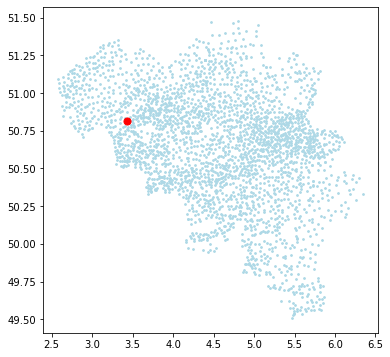

In [37]:
# plot first customer on map
plt.figure(figsize=(6, 6))
plt.scatter(postcodes_df["LONG"], postcodes_df["LAT"], s=3, color="lightblue")
plt.scatter(cust_long, cust_lat, s=50, color="red")
plt.show()

In [733]:
# define function to get calcultate euclidean distance between coordinates
def euclidean_distance(x_long, x_lat, y_long, y_lat):
    # get euclidean distance between two pairs of coordinates
    dist = ((x_long - y_long) ** 2 + (x_lat - y_lat) ** 2) ** 0.5
    # retrn
    return(dist)

In [735]:
############################
######### EXERCISE #########
############################


# get coordinates of Ghent


# test function to get distance between customer coordinates and Ghent coordinates




<font size="3"> Now, you can find the **city which is closest to the coordinates of the customer** to infer the customer's city

## Question 5

<font size="4"> Are the **locations of employees also biased**?

In [39]:
# import data
employees_df = pd.read_csv("./data/HVC_AM0.csv", sep=";")

In [40]:
# check
employees_df.head(5)

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE
0,18503611215721,1001.0,BOONE Frederik,2460,Tielen,nl-BE
1,18503612347289,1021.0,JANSSENS Jos,2400,Mol,nl-BE
2,18503612452173,1022.0,LEYSEN Michiel,3500,Hasselt,nl-BE
3,18503621528962,1122.0,ALLEMAN Benny,3900,Overpelt,nl-BE
4,18503622652855,1135.0,GOOVAERTS Jef,3920,Lommel,nl-BE


In [42]:
# import all cities and corresponding postcodes from Belgium
postcodes_df = pd.read_csv("./data/zipcode-belgium.csv", header=None)
# define column names
postcodes_df.columns = ["POSTCODE", "LOCATION", "LONG", "LAT"]

In [43]:
# check
postcodes_df.head(5)

,POSTCODE,LOCATION,LONG,LAT
0,1000,Bruxelles,4.351697,50.846557
1,1020,Laeken,4.348713,50.883392
2,1030,Schaerbeek,4.373712,50.867604
3,1040,Etterbeek,4.389510,50.836851
4,1050,Ixelles,4.381571,50.822285


In [44]:
# join with employees
employees_postcodes_df = pd.merge(left=employees_df, right=postcodes_df, on="LOCATION", how="inner")

In [45]:
# check
print("total number of employees: %s" %len(employees_df))
print("total number of employees with geo info: %s" %len(employees_postcodes_df))

total number of employees: 46
total number of employees with geo info: 43


In [ ]:
############################
######### EXERCISE #########
############################


# plot all belgian cities + employee locations on same map




<font size="3"> So at first sight, the locations of the employees seem correct, with most of the employees living in the Kempen region. This is maybe because the headquarters of the company is located in that region.

## Question 6

<font size="4">Inspect **which employees are assigned to which routes**

In [47]:
# import transactions data
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")
# import customer data
customer_df = pd.read_csv("./data/HVC_SO0.csv", sep=";")
# import routes data
routes_df = pd.read_csv("./data/HVC_HVROUTETEMPLATE.csv", sep=";")
# join tables
routes_employees = transactions_df.merge(customer_df, on="SO0_NRID", how="inner").merge(routes_df, on="HVROUTETEMPLATE_NRID", how="right")
# get unique route - employee pairs
routes_employees = routes_employees[["HVROUTETEMPLATE_NRID", "AM0_NRID"]].drop_duplicates()

In [48]:
# check
routes_employees.head(5)

,HVROUTETEMPLATE_NRID,AM0_NRID
0,70671404.0,24226444135852
1,219018687.0,23186288605042
17,219018687.0,23845760556442
22,219018687.0,24705284396450
41,219018687.0,25146868694050


In [49]:
# check all routes to which employee with id 24705284396450 is assigned
routes_employees[routes_employees["AM0_NRID"] == 24705284396450]["HVROUTETEMPLATE_NRID"]

22       219018687.0
7236     219019324.0
14441    219019962.0
23351    219020601.0
29533    219021241.0
35685    219021882.0
41546    219022524.0
47260    219023167.0
54337    219023811.0
60560    219024456.0
Name: HVROUTETEMPLATE_NRID, dtype: float64

In [50]:
# check all employees which are assigned to route 219018687.0
routes_employees[routes_employees["HVROUTETEMPLATE_NRID"] == 219018687]["AM0_NRID"]

1       23186288605042
17      23845760556442
22      24705284396450
41      25146868694050
42      24871084536436
91      20624864486850
3218    25454644465046
5421    24226444135852
6918    25532744515046
7015    24775352442450
Name: AM0_NRID, dtype: int64

## Question 7

<font size="4"> Which **employees should be assigned to different routes**?

<font size="3"> Is it possible to find two employees that can swith routes, such that the travel distance of both employees is shorter?

In [51]:
# check dataset created in previous question
routes_employees.head(5)

,HVROUTETEMPLATE_NRID,AM0_NRID
0,70671404.0,24226444135852
1,219018687.0,23186288605042
17,219018687.0,23845760556442
22,219018687.0,24705284396450
41,219018687.0,25146868694050


<font size="3">Lets investigate the route 70671404.0 to which employee 24226444135852 is assigned

In [52]:
# define route
route_id = 219018687
# define employee
employee_id = 23186288605042

<font size="3"> Get coordinates of customer assigned to this route

In [53]:
# import customer and position data
cust_df = pd.read_csv("./data/HVC_SO0.csv", sep=";")
cust_pos_df = pd.read_csv("./data/HVC_HVPOSITION.csv", sep=";")
# merge
cust_all_df = pd.merge(cust_df, cust_pos_df, on="SO0_NRID", how="inner")

In [54]:
# get all the customer locations of route
route_locs = cust_all_df[cust_all_df["HVROUTETEMPLATE_NRID"] == route_id][["LONG", "LAT"]].drop_duplicates()

In [55]:
# check
route_locs

,LONG,LAT
326,3.708606,50.980740
327,3.712480,50.977313
328,3.717360,50.971535
329,3.717471,50.967531
330,3.717015,50.965532
...,...,...
5492,3.698154,50.961381
5536,3.694914,50.987235
5567,3.725134,50.997905
5611,3.679778,50.929148


<font size='3'> Get coordinates of depot

In [56]:
# import depots
depots_df = pd.read_csv("./data/HVC_DEPOT.csv", sep=";")
# import postcodes
postcodes_df = pd.read_csv("./data/zipcode-belgium.csv", header=None)
postcodes_df.columns = ["POSTCODE", "CITY", "LONG", "LAT"]

In [57]:
# get depot city
depot_city = depots_df[depots_df["HVROUTETEMPLATE_NRID"] == route_id]["DEPOT"].iloc[0]
# get depot coordinates
depot_loc = postcodes_df[postcodes_df["CITY"] == depot_city][["LONG", "LAT"]].drop_duplicates()

In [58]:
# check
depot_loc

,LONG,LAT
245,4.399708,51.22111


<font size='3'> Get coordinates of employee

In [70]:
# import employee dataset
employee_df = pd.read_csv("./data/HVC_AM0.csv", sep=";")
# get employee city
employee_city = employee_df[employee_df["AM0_NRID"] == employee_id]["LOCATION"].iloc[0]
# get employee coordinates
employee_loc = postcodes_df[postcodes_df["CITY"] == employee_city].drop_duplicates()

In [71]:
# check
employee_loc

,POSTCODE,CITY,LONG,LAT
598,3665,As,5.572203,51.00054


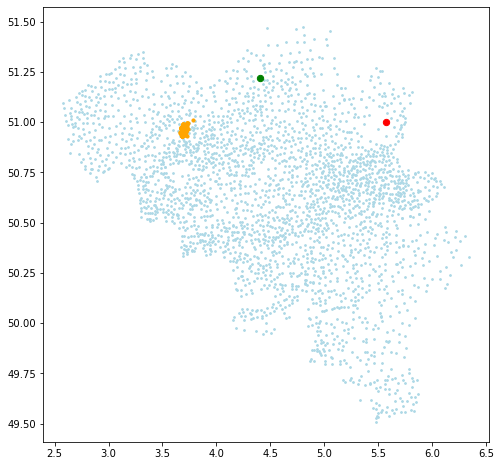

In [72]:
# plot employee, depot, and route locations
plt.figure(figsize=(8, 8))
plt.scatter(postcodes_df["LONG"], postcodes_df["LAT"], s=3, color="lightblue")
plt.scatter(employee_loc["LONG"], employee_loc["LAT"], s=40, color="red")
plt.scatter(depot_loc["LONG"], depot_loc["LAT"], s=40, color="green")
plt.scatter(route_locs["LONG"], route_locs["LAT"], s=10, color="orange")

In [ ]:
############################
######### EXERCISE #########
############################

# get total distance (in terms of euclidean distance) that the employee needs to travel
# you can use the location of a random customer on the route to represent this route



<font size="3"> We observe that this customer needs to travel a long distance to serve these customers.
Could this employee maybe switch routes with another employee, such that they both need to travel less?

## Question 8

<font size="4"> Could it be valuable to **recommend products to customers?**

<font size="3">One way to tackle this problem is by investigating whether there are products that are often purchased together. 
If for example product X is often bought together with product Y, and a certain customer buys product X, 
then we can recommend product Y to this customer. This is an example of **item-based recommendations**, as we are going to recommend similar items.

In [3]:
# import transactions df
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")
# convert date
transactions_df["DATEONLY"] = pd.to_datetime(transactions_df["DATEONLY"])
# import trainsaction details df
details_df = pd.read_csv("./data/HVC_VISITRESULTDETAILS.csv", sep=";")
# join
transactions_details_df = pd.merge(left=transactions_df, right=details_df, on="HVVISITRESULT_NRID", how="inner")

In [4]:
# check
transactions_details_df.head(3)

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,VISITRESULTDETAILS_NRID,AR0_NRID,QUANTITY
0,55681456,719952,23186288605042,2,"12:20:01,000000000",2019-05-06,16.9,cash,55681457,23678,1.0
1,55681456,719952,23186288605042,2,"12:20:01,000000000",2019-05-06,16.9,cash,55681458,17453864687246,1.0
2,55681507,1453609,19946584592834,2,"12:13:50,000000000",2019-05-06,7.4,cash,55681508,23678,1.0


<font size="3">First, we will extract all the **unique products that were bought during each transaction**. 
This will allow us to count in how many transactions a pair of products was bought together.

In [5]:
# get unique transactions
trans_ids = transactions_details_df["HVVISITRESULT_NRID"].unique().tolist()
# initialize container
trans_products = []

# loop through all the transactions
for trans_id in trans_ids:
    # get unique products that were bought during transaction
    products = transactions_details_df[transactions_details_df["HVVISITRESULT_NRID"] == trans_id]["AR0_NRID"].unique().tolist()
    # add to container
    trans_products.append(products)

In [76]:
# check the products that were bought in the first transaction
trans_products[0]

[23678, 17453864687246]

In [77]:
# import the products dataset
products_df = pd.read_csv("./data/HVC_AR0.csv", sep=";")

In [78]:
# check
products_df.head(5)

,AR0_NRID,DESCRIPTION,CATEGORY,FAMILY,PRICE
0,20742288286838,Dessert Caramel/14,Verkoopsartikel,Cups,10.9
1,20413488326838,Penalty/16,Verkoopsartikel,Hand Ice,6.5
2,21515648414638,Kriekentaart,Verkoopsartikel,Coffee,7.9
3,20296288686840,Expo met zachte wafel/12,Verkoopsartikel,Individual Dessert,7.3
4,21844652504048,Paaseitjes,Verkoopsartikel,Individual Dessert,7.5


<font size="3">So now we can for example check **which product was most often bought together with the product Dessert Caramel/14**

In [79]:
# get product id from Dessert Caramel
product_id = int(products_df[products_df["DESCRIPTION"] == "Dessert Caramel/14"]["AR0_NRID"])

In [80]:
# initialize empty container
other_products = []


# loop through the transactions
for products in trans_products:
    # check if Dessert Caramel was bought in transaction
    if product_id in products:
        # loop through the products that were bought in that transaction
        for product in products:
            if product != product_id:
                # add product to container
                other_products.append(product)

In [ ]:
############################
######### EXERCISE #########
############################


# get product that was bought the most often together with Dessert Caramal


<font size="3">So we can see that the product Dessert Dame Blanche is the product that was most often bought together with the product Dessert Caramel.
So maybe, we can recommend the product Dessert Dame Blanche to a customer that only buys the product Dessert Caramel. The same analysis can be done for the other products. However, maybe it is also a good idea to only recommend products that were bought together at least X times with a product. Also, it is maybe better to only recommend products that are from the same product family.

<font size="3">In the example above, we construct a very basic item-based recommendation system. 
However, we could also construct a **customer-based recommendation system.** 
Here, products that were bought by similar customers are recommended. 
The similarity between customers is calculated based on several features such as:
        
        - demographics
        - transactional data
        - ...
    
The similarity itself can be calculated by different similarity measures such as:
        
        - euclidean distance
        - cosine similarity
        - ...

<font size="3">So lets try to calculate some transactional features from customers such as the Recency, Frequency and Monetary Value.
Then, we will try to find customers who have similar purchase behavior.

<font size="3"> **Recency**: The number of days between today and the customer's last purchase

In [89]:
############################
######### EXERCISE #########
###########################

# get recency per customer and store in dataframe with two columns: cust_id and recency



<font size="3"> **Frequency**: The number of times a customer made a purchase

In [93]:
############################
######### EXERCISE #########
###########################



# get frequency per customer and store in dataframe with two columns: cust_id and frequency



<font size="3"> **Monetary Value**: The total purchase amount of a customer

In [625]:
############################
######### EXERCISE #########
###########################



# get monetary value per customer and store in dataframe with two columns: cust_id and monetary value


In [ ]:
############################
######### EXERCISE #########
###########################


# join all datasets together
cust_info = 



<font size="3">Now suppose we want to make recommendation for customer with id 687782. 
In order to to this, we will calculate the **cosine similarity** between the feature vector of customer 687782 and the feature vector of all the other customers. Then, the customer that has the highest cosine similarity score is the most similar customer.

In [765]:
# get feature vector for customer
feature_vector_x = np.array(cust_info[cust_info["SO0_NRID"] == 687782][["MONETARY", "FREQUENCY", "RECENCY"]])

In [766]:
# check
feature_vector_x

array([[182.,  17., 304.]])

In [767]:
# import cosine similarity metric
from sklearn.metrics.pairwise import cosine_similarity

In [768]:
# test similarity
cosine_similarity(feature_vector_x, feature_vector_x)[0][0]

1.0

In [769]:
############################
######### EXERCISE #########
############################



# define function to get most similar customer
def get_most_similar_cust(cust_id, cust_info):
    
    # initialize cosine dist
    best_cos_sim = 0
    # initialize most similar cust
    sim_cust= None
    
    # get feature vector of customer
    feature_vector_x = np.array(cust_info[cust_info["SO0_NRID"] == cust_id][["MONETARY", "FREQUENCY", "RECENCY"]])
    
    # loop through other customers 
    for i in range(len(cust_info)):
        
        # get cust id
        other_cust_id =int(cust_info["SO0_NRID"].iloc[i])
        
        # make sure we only get other customers
        if other_cust_id != cust_id:
            
            # get feature vector from other customer

            # get cosine similarity
            
            # check if similarity is higher than current highest similarity and update sim_cust and best_cost_sim

                
    # return cosine similarity and customer id
    return(best_cos_sim, sim_cust)

In [770]:
# get the customer which is most similar to customer 687782 in terms of historical purchase behavior
get_most_similar_cust(cust_id=687782, cust_info=cust_info)

(0.9999998526495412, 1251166)

<font size="3">So now we have extracted the customer that is most similar to customer 687782 in terms of historical purchase behavior (Recency, Frequency, Monerary Value).
**Products that were bought by this customer can now be recommended to customer 687782**

In [771]:
# get all products bought by customer 687782
products_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == 687782]["AR0_NRID"])
# get all products bought by most similar customer
products_other_cust = set(transactions_details_df[transactions_details_df["SO0_NRID"] == 1251166]["AR0_NRID"])
# get products bought by most similar customer but not yet by customer 687782
products_other_cust.difference(products_cust)

{23742,
 23745,
 23750,
 23760,
 23777,
 38848673,
 42606882,
 46260776,
 290318653,
 290318655}

<font size="3"> The **recommendation systems in previous examples are very simplistic and could be improved a lot**. 
For example, the item-based recommendation system could for example also take into account the family of products: 
    only recommend products that are from the same family. 
    The customer-based recommendation system could take into account a lot more features, such as demographics etc.
    Also, both systems could be joined together to improve recommendations even further.
    Finally, you could also use more advanced systems such as collaborative filtering.

# 2. Python

## 2.1. Groupby

<font size="4"> How can we get pandas ‘groupby‘ command to return a DataFrame instead of a Series ?

In [520]:
# import transactions data
transactions_df = pd.read_csv("./data/HVC_HVVISITRESULT.csv", sep=";")
# import customer data
customers_df = pd.read_csv("./data/HVC_SO0.csv", sep=";")

In [521]:
# join both datasets together
transactions_customers_df = pd.merge(left=transactions_df, right=customers_df, how="inner", on="SO0_NRID")

In [522]:
# check
transactions_customers_df.head(3)

,HVVISITRESULT_NRID,SO0_NRID,AM0_NRID,HVOUTCOME_NRID,VISITDATE,DATEONLY,AMOUNT,PAYMENTTERM,HVROUTETEMPLATE_NRID,CUST_TYPE,POSTCODE,LANGUAGE,SEASON_TYPE
0,55681456,719952,23186288605042,2,"12:20:01,000000000",2019-05-06,16.9,cash,219019962.0,Private,3950,nl-BE,All time
1,55248854,719952,23186288605042,2,"12:46:43,000000000",2019-04-22,7.4,cash,219019962.0,Private,3950,nl-BE,All time
2,54761459,719952,23186288605042,2,"12:32:05,000000000",2019-04-08,7.4,cash,219019962.0,Private,3950,nl-BE,All time


In [523]:
# lets calculate the average transaction amount per route
avg_amount_per_route = transactions_customers_df[transactions_customers_df["HVOUTCOME_NRID"] == 2] \
                                              .groupby("HVROUTETEMPLATE_NRID")["AMOUNT"] \
                                              .mean()

In [524]:
# check
avg_amount_per_route.head(3)

HVROUTETEMPLATE_NRID
70671404.0     95.900000
219018687.0    16.162435
219019324.0    12.036478
Name: AMOUNT, dtype: float64

In [525]:
# check columns
avg_amount_per_route.columns

AttributeError: 'Series' object has no attribute 'columns'

<font size="3">As you can see the output of the groupby function is a Pandas Series. 
However, you can get the **output of a groupby function as a Dataframe by using the reset_index() function**

In [526]:
############################
######### EXERCISE #########
############################



# lets calculate the average transaction amount per route and convert it to a DataFrame
avg_amount_per_route = 



In [ ]:
# check first 3 observations
avg_amount_per_route.head(3)

In [ ]:
# check columns names
avg_amount_per_route.columns

<font size="3">We can also extract **multiple statistics for several features per group**

In [529]:
# define aggregation dict
agg_dict = {"AMOUNT": [np.mean, np.std], "PAYMENTTERM": [statistics.mode]}

In [530]:
# group observations per route and get statistics per feature
avg_amount_per_route = transactions_customers_df[transactions_customers_df["HVOUTCOME_NRID"] == 2] \
                                            .groupby("HVROUTETEMPLATE_NRID") \
                                            .agg(agg_dict) \
                                            .reset_index()

In [531]:
# check
avg_amount_per_route.head(5)

HVROUTETEMPLATE_NRID     AMOUNT            PAYMENTTERM
                             mean        std        mode
0           70671404.0  95.900000        NaN         tbp
1          219018687.0  16.162435  61.955105        cash
2          219019324.0  12.036478  11.802005        cash
3          219019962.0  12.011734  10.378802        cash
4          219020601.0  12.079423   8.990282        cash

In [532]:
# check columns
avg_amount_per_route.columns

MultiIndex([('HVROUTETEMPLATE_NRID',     ''),
            (              'AMOUNT', 'mean'),
            (              'AMOUNT',  'std'),
            (         'PAYMENTTERM', 'mode')],
           )

<font size="3">So if you get multiple statistics for different features per group, 
then you obtain a Dataframe that has **multiple levels of column names**

In [533]:
# get avg amount per route
avg_amount_per_route["AMOUNT"]["mean"].head()

0    95.900000
1    16.162435
2    12.036478
3    12.011734
4    12.079423
Name: mean, dtype: float64

In [536]:
# get most occuring paymentterm per route
avg_amount_per_route["PAYMENTTERM"]["mode"].head()

0     tbp
1    cash
2    cash
3    cash
4    cash
Name: mode, dtype: object

In [537]:
# We can also merge both column levels such that we only have one level of columns
avg_amount_per_route.columns = avg_amount_per_route.columns.map('_'.join).str.strip('_')

In [538]:
# check
avg_amount_per_route.head(5)

,HVROUTETEMPLATE_NRID,AMOUNT_mean,AMOUNT_std,PAYMENTTERM_mode
0,70671404.0,95.900000,NaN,tbp
1,219018687.0,16.162435,61.955105,cash
2,219019324.0,12.036478,11.802005,cash
3,219019962.0,12.011734,10.378802,cash
4,219020601.0,12.079423,8.990282,cash


In [539]:
# get avg amount per route
avg_amount_per_route["AMOUNT_mean"].head()

0    95.900000
1    16.162435
2    12.036478
3    12.011734
4    12.079423
Name: AMOUNT_mean, dtype: float64

## 2.2. Pipeline Linear Regression

<font size="4">In this tutorial we will build an **entire pipeline for fitting a linear regression model**:
        
        1. Impute missing values
        2. Normalize numeric features
        3. Encode categorical features
        4. Build regression model
        5. Evaluate final regression model

<font size="3">First, let us import the the basetable.csv dataset

In [275]:
# import the data
df = pd.read_csv("./data/basetable.csv")

In [276]:
# check first 5 rows
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,clv
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,962.456256
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,784.776622
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,579.092101
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,588.901693
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,738.469951


<font size="3">This dataset is obtained from a Telecom Company and contains **features** about its customers:

    - how many minutes a customer called during the day
    - how many minutes a customer called during the night
    - how long the customer is already a customer from the company
    - the state in which the customer lives
    - ...
    
The dataset also contains a variable **clv** which is equal to the customer lifetime value.
The higher the clv of a customer, the more the customer was profitable for the company.

Hence, we will try to build a **linear regression model that is able to find a relationship between all the customer features and the clv**. This will allow us then to predict the clv for future customers based on there features, and hence allows the telecom company to reward customers with high predicted clv values.

### Step 1: Imputing missing values

<font size="3">In order to train a linear regression model, the data should not contain any missing values.
Inspect how many missing values there are per column

In [277]:
# check number of missing values per column
for col in df.columns:
    # get number of missing values for column
    num_miss = sum(df[col].isnull())
    # print
    print(col, num_miss)

state 0
account_length 0
international_plan 247
voice_mail_plan 0
number_vmail_messages 0
total_day_minutes 0
total_day_calls 0
total_day_charge 493
total_eve_minutes 0
total_eve_calls 0
total_eve_charge 0
total_night_minutes 0
total_night_calls 0
total_night_charge 0
total_intl_minutes 0
total_intl_calls 0
total_intl_charge 0
customer_service_calls 0
clv 0


<font size="3">In total, there are two variables with missing values: 
the international_plan variable which is categorical and the total_day_charge variable with is numeric.
Missing values of categorical variables are often imputed with the mode of the variable,
while missing values of numeric variables are often imputed with the mean of the variable.
    
    1. Calculate the mode of the international_plan variable and store in a variable
    2. Impute the missing values of the international_plan with the mode
    3. Calculate the mean of the total_day_charge variable and store in a variable
    4. Impute the missing values of the total_day_charge variable with the mean

In [ ]:
############################
######### EXERCISE #########
############################


# calculate mode of international plan


# impute missing values of international plan with mode


# check number of missing values in international plan

In [ ]:
############################
######### EXERCISE #########
############################


# calculate mean of total day charge


# impute missing values of total day charge with mean


# check number of missing values in total day charge


### Step 2: Normalize numeric features

<font size="3">Now that all missing values are imputed, we need to normalize the numeric features 
because a difference in the variance of the different features can have a huge impact on the model performance.
Hence, define a function which normalizes every numeric feature in the dataset between 0 and 1, 
except for the dependent variable offcourse.
    
    1. Define a function thataccept two parameters: the dataset and the name of dependent variable which we dont want to normalize
    2. The function should then extract all the numeric features
    3. Next, the function should normalize all the numeric features between 0 and 1
    4. Finally, the function should return the dataset with the normalized features
    
 

In [280]:
# import the required sklearn class
from sklearn.preprocessing import MinMaxScaler

In [281]:
############################
######### EXERCISE #########
###########################



# define function that normalizes numeric features
def normalize_features(df, name_dependent):
    
    # get list of all the names of the numeric features, excluding the dependent variable
    all_features = set(df._get_numeric_data().columns)
    num_features = list(all_features - set([name_dependent]))
    
    # initialize normalizer
    

    # fit scaler on all the numeric features

    
    # normalize numeric features by applying scaler on the features

    # return data
    
    
    

In [282]:
# test function 
df = normalize_features(df, "clv")

In [283]:
# check
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,clv
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.409464,0.169157,0.558055,0.625567,0.565998,0.559815,0.587958,0.559768,0.447140,0.492788,0.447165,0.536665,0.237987,0.537076,0.205093,829.173377
std,0.162613,0.276196,0.159135,0.123326,0.141610,0.142065,0.118935,0.142051,0.146249,0.148312,0.146325,0.146831,0.128626,0.146903,0.164049,188.504217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.318947
25%,0.297521,0.000000,0.455147,0.543750,0.495634,0.461815,0.511765,0.461890,0.349203,0.392308,0.349209,0.444444,0.157895,0.445098,0.142857,726.844087
50%,0.409091,0.000000,0.565169,0.625000,0.565998,0.561124,0.588235,0.561109,0.446200,0.492308,0.446203,0.539683,0.210526,0.539216,0.142857,839.609099
75%,0.520661,0.420000,0.667304,0.706250,0.643128,0.657326,0.670588,0.657340,0.547467,0.592308,0.547468,0.634921,0.315789,0.635294,0.285714,952.014373
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1433.233389


###  Step 3: Encode categorical features

<font size="3">In a final preprocessing step, we should encode the categorical variables, 
because most machine learning models can only work with numeric data.
Hence, you should create a function that enocdes every categorical variable.

    1. Define a function that accepts 1 parameter: the data
    2. The function should then extract the categorical variables
    3. The function should then encode all the categorical variables
    4. finally, the function should return the dataset with the encoded categorical variables

In [284]:
# import the required sklearn class
from sklearn.preprocessing import LabelEncoder

In [285]:
# define a function to encode all categorical features
def encode_features(df):
    
    # extract list of all the names of the categorical variables
    all_cols = set(df.columns)
    all_numerics = set(df._get_numeric_data().columns)
    all_categoricals = list(all_cols - all_numerics)

    
    # loop through categorical variables
    for col in all_categoricals:
        
        # initialize encoder
        encoder = LabelEncoder()
        
        # fit encoder on variable
        encoder.fit(df[col])
        
        # encode variable by applying encoder on variable
        df[col] = encoder.transform(df[col])
        
    # return dataset
    return(df)
        

In [286]:
# test function
df = encode_features(df)

In [287]:
# check
df["international_plan"].head()

0    0
1    0
2    0
3    1
4    1
Name: international_plan, dtype: int64

### step 4: Train linear regression model

<font size="3">Now that all the missing values are imputed, the numeric variables are scaled and the categorical variables are encoded, we can fit our linear regression model.

Fit a linear regression model with clv being the dependent variable and all the other features being the features

In [288]:
# import the sklearn class
from sklearn.linear_model import LinearRegression

In [ ]:
############################
######### EXERCISE #########
###########################


# get a list with all the names of the features

# initialize the model

# fit the model on the data


### Step 5: Explain the model

<font size="3">Now that the model is trained, we can inspect the coefficients and hence the impact of each variable.
Get the 5 variables that have the highest impact in absolute terms on the dependent variable clv.

In [290]:
# create dataframe with two columns: the feature names and the corresponding coefficients
coef_df = pd.DataFrame({"name": feature_names, "coef": lr_model.coef_})

# create extra column that equals the absolute value of the coefficients
coef_df["coef_abs"] = abs(coef_df["coef"])

# sort dataframe by absolute value of coef
coef_df = coef_df.sort_values(by="coef_abs", ascending=False)

# get the subset of 5 variables with highest coef
coef_df.iloc[:5]

,name,coef,coef_abs
7,total_night_minutes,31703.721873,31703.721873
12,total_night_charge,-31621.344666,31621.344666
14,total_eve_minutes,31366.524359,31366.524359
0,total_eve_charge,-30589.586750,30589.586750
11,total_intl_minutes,3946.672612,3946.672612


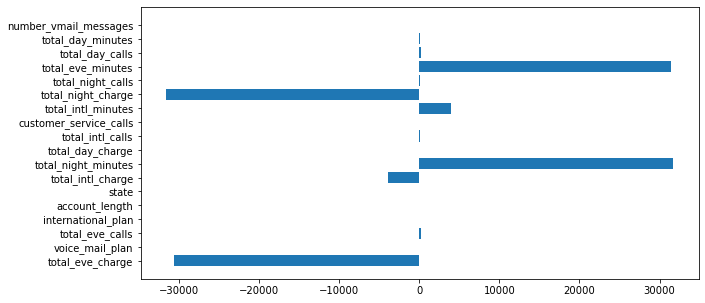

In [291]:
# visualize coefficients
plt.figure(figsize=(10, 5))
plt.barh(y=range(len(lr_model.coef_)), width=lr_model.coef_)
plt.yticks(range(len(lr_model.coef_)), feature_names)
plt.show()

### Step 6: Evaluate model

<font size="3">Finally, we can evaluate the model by comparing its estimated values predictions with the true values.
Get the predicted values for the dependent variable for each observation and calculate the rmse and mae.
Also plot the distribution of the true values and the distribution of the predicted values in the same plot.

In [292]:
# import the sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [293]:
# get predictions
preds = lr_model.predict(df[feature_names])

In [294]:
# get rmse and mae
rmse = mean_squared_error(df["clv"], preds) ** 0.5
mae = mean_absolute_error(df["clv"], preds)

In [295]:
print(rmse)
print(mae)

148.08436706905817
102.05013714538242


/Users/arnoliseune/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/arnoliseune/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


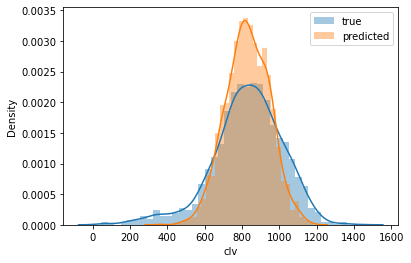

In [296]:
# plot distributions
sns.distplot(df["clv"], label="true")
sns.distplot(preds, label="predicted")
plt.legend(loc="upper right")
plt.show()